In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

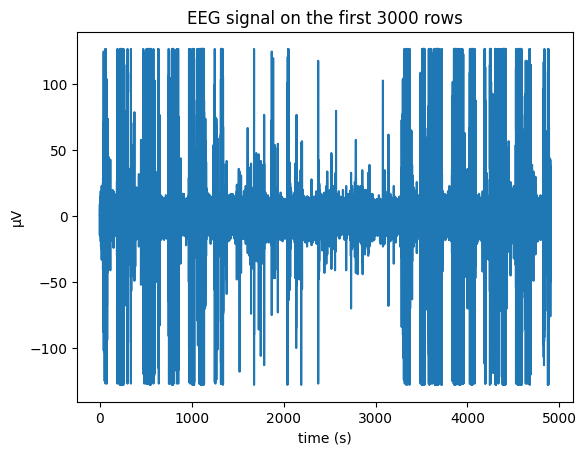

In [5]:
df = pd.read_csv('../data/eeg_j7.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal on the first 3000 rows')
# plt.savefig("./figures/EEG_signal_all_data.png")
plt.show()

## Divide by timestemp

In [69]:
with open("../data/time_stemp_2_J13.txt", 'r' ) as f : 
    time_stemp = [*f.read().strip()]

def tstemp(position:list = time_stemp, second:str = '../data/time_stemp_J13.txt') : 
    df = pd.read_csv(second, header = None)
    df = df.transpose()
    df.columns = ['second']
    df['position'] = position
    df['second'] = df['second'].astype(float)

    res = []
    positionTime = list(zip(df['second'], df['position']))
    
    chemins = []
    i = 0
    while i < len(positionTime) :
        if positionTime[i][1] == 'a' :
            j=1
            while positionTime[i+j][1] != 'a' :
                j+=1
            chemins.append(positionTime[i:i+j+1])
            j-=1
            while positionTime[i+j][1] != 'e' and positionTime[i+j][1] != 'd' : 
                j+=1
            nb_in_sample = len(chemins[-1])
            chemins.append(positionTime[i+nb_in_sample-1:i+j+1])
        i+=j+1
    return chemins

chemins = tstemp()       
cheminsStr = ["".join([i[1] for i in chem]) for chem in chemins]
cheminsStr
# len(cheminsStr)


['abcba',
 'abce',
 'abcba',
 'ababcbcd',
 'abcdcba',
 'abce',
 'abcecba',
 'abcd',
 'abcba',
 'abce',
 'abcdcba',
 'abce',
 'abcba',
 'abce',
 'aba',
 'abce',
 'abcda',
 '',
 'abcba',
 'abcbcd',
 'abcecba',
 'abce',
 'abcdcba',
 'abce',
 'abcecba',
 'abcbcbce',
 'abcecbcba',
 'abce',
 'abcdcba',
 'abcbcbcd',
 'abcecba',
 'abce',
 'abcdcba',
 'abcbcd']